# Seaborn Learning Notes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Relation Plot 

- `relplot()` is the meta plotting method for relation plot
- `lineplot()`
- `scatterplot()`

### 1.0 Key Takeaways
- `relplot()` can be very useful for data exploration.
- `relplot()` supports line plot and scatter plot
- `relplot()` support hue, size, style encoding
- `relplot()` line plot will use distribution estimator when there are multiple
- use query to filter the data when there are lots of features 
- use params `hue=`, `size=`, `style=` to group and encode the features for better visualization
- use `unit` to group and split the data without encoding. (for line plot)
- configure the color using `palatte`
- use `col=`, `row=`, `col_wrap` to create subplots!

### 1.1 Line Plot `lineplot()` and Scatter Plot `scatterplot()` 

Support most of the parameters in `relplot()`

[Go Down](#sec2)

### 1.2 `relplot()` Parameters for Line and Scatters
 
**Useful Params**

|Params|Input|Notes|
|-|-|-|
|`x`, `y`, `data`|col_names & dataframe|Basic scatter plot for exploring relations
|`kind`|'line', 'scatter'|Plot type. 
|`hue`|fea_name|Encode the plotted points using different color according to the values of a feature. Color's intensity is determined by the value. Use bucket if feature is continuous feature.
|`style`|fea_name|Encode the plotted points using differnet shape according to the values of a feature. Can be used jointly with `hue` for double encoding!
|`unit`|fea_name|when use line plot, specify the unit feature will plot multiple lines using data grouped by value for the specified feature
|`col`|fea_name|create sub plots using grouped data (grouped by feature values), subplots will be arranged column-wise
|`col_wrap`|int|specify how many subplots per row. There is NO `row_wrap` param
|`row`|fea_name|create sub plots using grouped data (grouped by feature values), subplots will be arranged row-wise. use `row=, col=` to construct 2-D grid plots
|`size`|fea_name|Encode the plotted points using differnet point size according to the values of a feature. 
|`palette`|str|Colors to use for the different levels of the `hue` variable. Should be something that can be interpreted by :func:`color_palette`, or a dictionary mapping hue levels to matplotlib colors.
|`sizes`|tuple|Control the size range for the size encoding.
|`ci`|None, 'sd'**, float|When there are multiple obsersation per x value, relplot by default will give 95 ci. set ci='sd' will give the std. If set ci to some float, e.g. 0.5 it will be 50% CI. (default is 95%
|`err_style`|`bar`|change the ci style
|`estimator`|None, some other function?|When there are multiple obsersation per x value, relplot by default will estimate the distribution of y for each x. Set to `None` to turn it off. Maybe it can also take some customized functions that work on dataframe.
|`dashes`|bool|whether use dashed lines
|`sort`|bool|Whether to sort x, useful when `kind=line`
|`markers`|bool|whether put markers on the lines. set `dashes=False, markers=True, style=xx` will make the style encoding work on the marker style
|`palette`|ColorPalette|specify the color palette for the plotting. creating a `ColorPalette` object using `sns.cubehelix_palette(n)`
|`height`, `width`|int|figure size|
|`lw`|int|line width


*NOTES*
- *95% confident Interval is the interval that the mean will be located at for 95% of the time.* 
    - CI: $\bar x \pm t_{0.05, n}\frac{s}{\sqrt n}$
- *Standard Deviation is a measurement of the spread of the data. $pm$ 2 std is just 95% of the data lies in.*

**How Encoding Works in Seaborn**
- seaborn provide many different encoding strategies: `hue`, `size`, `style`
- when applying the encoding on the scatter plot, it will affect the point color, size, styles according to the column value for encoding. 
- when applying the encoding on the line plot, it will plot multiple lines in different color, size, style according to the column value for encoding

**Some other Tricks**: 
- `relplot()` returns a `FacetGrid` object that has a `fig` attributes, under `fig` attribute, there is a `autofmt_xdate()` that can automatically adjust the orientation of the date labels on x axis.

## 2. Categorical Data Plot


### 2.1 Plot Kinds
- `catplot()` is the meta method for categorical plot. All below method can be realized with `catplot()` by specifying the `kind=plot_type_name`
    - `stripplot()` plot the data in strip pattern.
    - `boxplot()` classic box plot with outlier, median, min, max, 25% 50% 75% quantiles.
    - `boxenplot()` similar to box plot but more intuitive expression
    - `violinplot()` more like plotting a PDF/PMF
    - `barplot()` classic bar plot
    - `countplot()` classic count plot
    - `pointplot()` use points to represent the mean of the cat data and draw lines between same encoding but differet x value to represent the difference
    - `swarmplot()` swarm plot
- ...

### 2.1 Parameters of `catplot()`

`catplot()` is the meta method for creating plots for categorical data (also works for continuous).

|Params|Input|Notes|
|-|-|-|
|`x`, `y`, `data`|col_names & dataframe|Basic scatter plot for exploring relations
|`jitter`|bool|whether to jitter the points for better visualization.
|`kind`|'strip', 'box', 'boxen', 'violin', 'bar', 'count', 'swarm'|the plotting style, default is strip plot
|support `hue` encoding but not `size` and `style`|||
|`order`|list|specify the order of the data categories from left to right
|`dodge`|bool|when using encoding, whether dodge the bins to avoid overlaps
|`split`|bool|when using violin plot, if the encoding is binary, it will use a splitting strategy to represent the encoded data
|`inner`|'stick'|when using violin plot, set `inner='stick'` will put data sticks in plot
|`ax`|graph's axis|plot a graph along another graph's axis, can be used for combining two plot

## 3. Describe Distribution 


### 3.1 Plot Kinds

- `distplot()`: meta method that combines the histogram with other seaborn plotting elements
    - Include or exclude the seaborn element by setting some params to False. E.g. `kde=False`, `rug=True` etc.
    - For example, set `kde=True, hist=False, rug=False` will give you a kde plot.
- `kdeplot()`
- `jointplot()`
- `rugplot()`

### 3.1 `distplot()`

`distplot()` is a histogram based plotting method. With option of including other seaborn plotting elements.

|Params|Input|Notes|
|-|-|-|
|kde|bool| Whether inlcude the gaussian kernel distribution estimate in the plot. Default is True. 
|rug|bool|Whether include the rug plot. Default is False. 
|hist|bool|Whether to incldue the histograms|
|bins|int|number of bins


### 3.2 `kdeplot()`

Gaussian kernel estimation of the data distribution. `kdeplot()` supports some additional setting that `distplot()` does not.

|Params|Input|Notes|
|-|-|-|
|`data`, `data2`|input1, input2|support bivariate plot
|shade|bool|whether use shade|
|cbar|bool|whether use color bar for bivariate plot|
|some params for the gaussian kernel estimations, e.g. `bw` for band width, `cut` for cut||

*For more about GKE:*
*https://en.wikipedia.org/wiki/Kernel_density_estimation*

### 3.3 `jointplot()`

`jointplot()` will make a bivariate plot with histogram + kde on each axis.

|Params|Input|Notes|
|-|-|-|
|`kind`|'scatter', 'reg', 'kde', 'recid', 'hex'|the bivariate plot kind|
||||

In [2]:
# some global setting
sns.set(style='darkgrid')
tips = sns.load_dataset('tips')
print(type(tips))
tips

<class 'pandas.core.frame.DataFrame'>


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


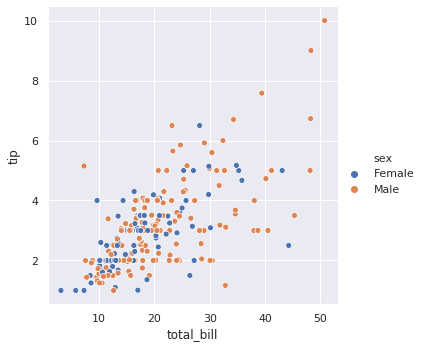

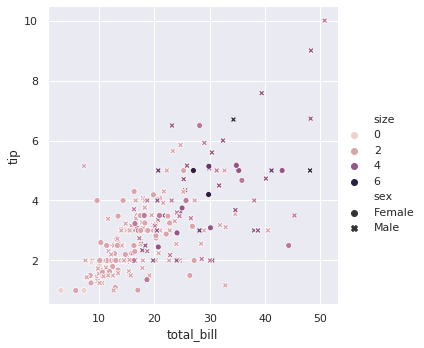

In [3]:
"""
relplot stands for relation plot
- x, y, data for specifying the input data
- hue for color encoding of the data
    - if hue column is numerical, it will adjust the color intensity based on the value
    - if hue column is categorical (str), it will chose two very different color
- style if for shape encoding of the data
"""
sns.relplot(x='total_bill', y='tip', data=tips, hue='sex')
sns.relplot(x='total_bill', y='tip', data=tips, hue='size', style='sex')

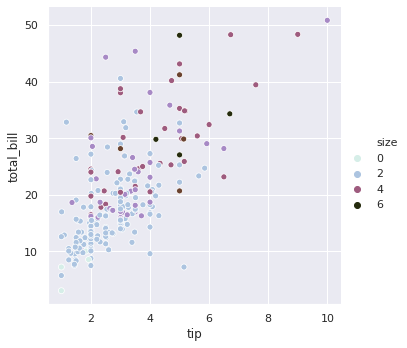

In [4]:
# use the palette can help you change the color
# how it work is kind of a mystery
# but 
sns.relplot(x='tip', y='total_bill', data=tips, hue='size', palette='ch:8, r=-1, l=0.9')

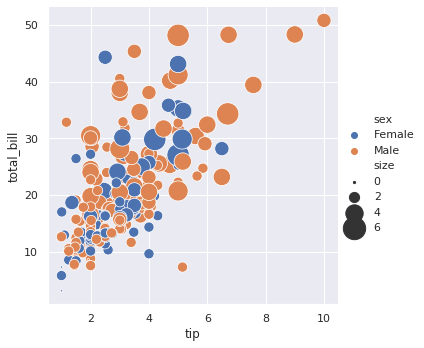

In [5]:
# ecode points with different size by values from a column
# use sizes to control the range of the size
sns.relplot(x='tip', y='total_bill', data=tips, hue='sex', size='size', sizes=(5, 500))

In [6]:
# create a random cumsum
indexes = np.arange(0, 500)
np.random.shuffle(indexes)  # inplace
times = np.arange(0, 500)
values = np.random.randn(500).cumsum()
df = pd.DataFrame({'time': times[indexes], 'val': values[indexes]})
df

,time,val
0,116,7.670852
1,478,44.392793
2,162,7.501825
3,0,1.267414
4,192,19.335986
...,...,...
495,438,32.625839
496,168,10.344282
497,113,10.803128
498,432,30.138115


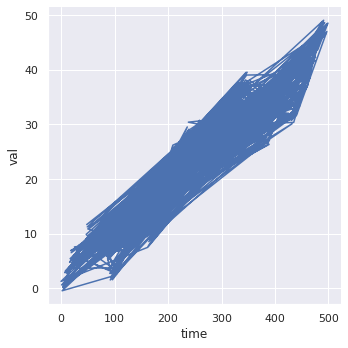

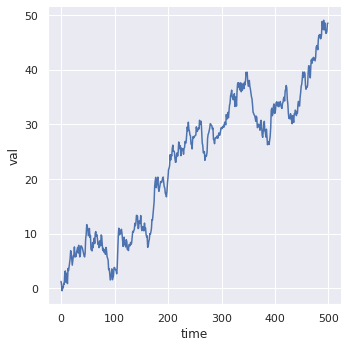

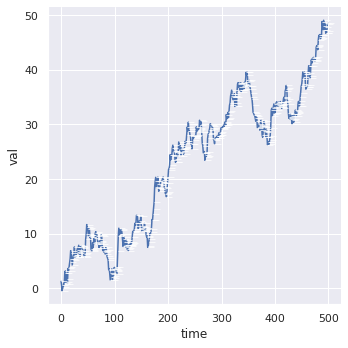

In [7]:
# use relplot to plot into line, sort will sort by x
sns.relplot(x='time', y='val', kind='line', data=df, sort=False)
sns.relplot(x='time', y='val', kind='line', data=df, sort=True)
# line with marker
sns.relplot(x='time', y='val', kind='line', marker=True, data=df, sort=True)

In [8]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


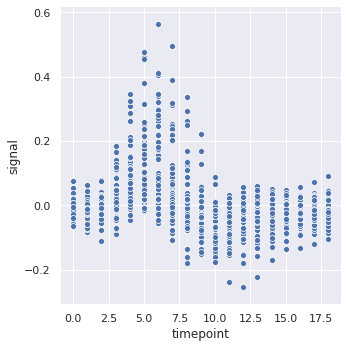

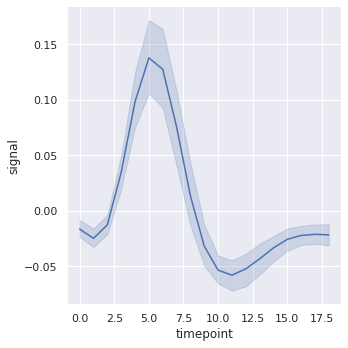

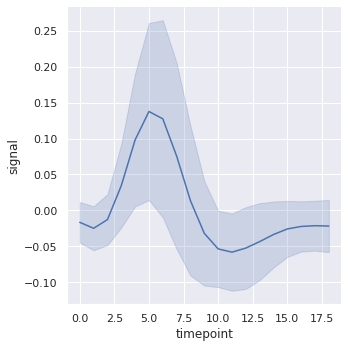

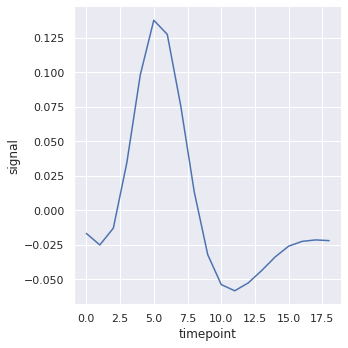

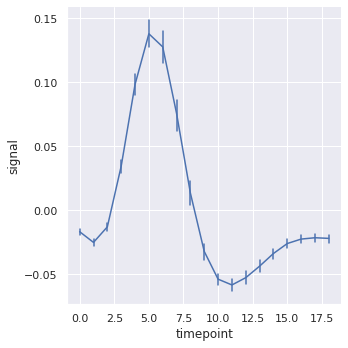

In [174]:
# When there are more than one value corresponeded to each x
# relplot will estimate the distrubution pf y for each x 
# relplot will automatically compute the 95% interval for it when chosing line plot!
# if turn off the ci, then it will plot the mean values for each x and make a line plot!
sns.relplot(x='timepoint', y='signal', data=fmri)
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line')  # by deafult using ci
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci='sd')  # use 2 std, data spread
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci=None)
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', ci=50, err_style='bars')

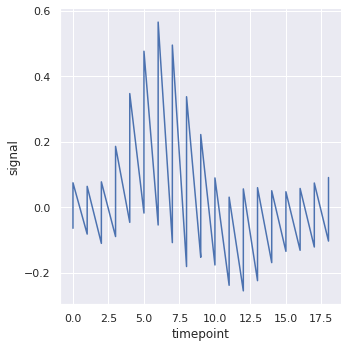

In [10]:
# we can turn off the estimator and just plot the line that link all the data points
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', estimator=None)

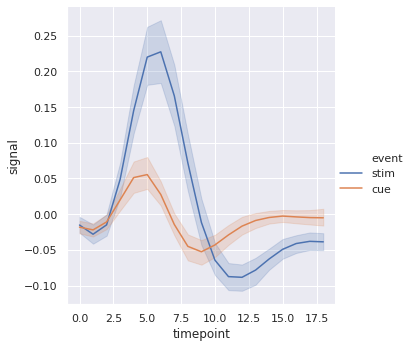

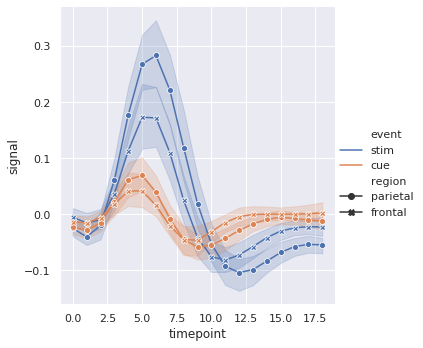

In [11]:
# hue encoding
# plot two seperated line by different events
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', hue='event')

# set the dashes to false and markers to true
# the style encoding will be on the markers
sns.relplot(x='timepoint', y='signal', data=fmri, kind='line', style='region', 
            hue='event', dashes=False, markers=True)

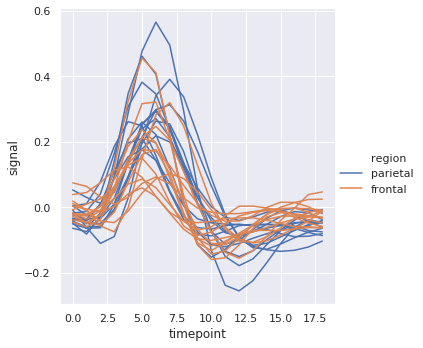

In [16]:
# use unit to plot multiple lines without encoding
# filter the data by query
# after applied filter, group by subject, region and encode color according to region
# we get a nice line plot of each defined group data
sns.relplot(x='timepoint', y='signal', data=fmri.query("event == 'stim'"), 
            kind='line', estimator=None, units='subject', hue='region')

In [13]:
dots = sns.load_dataset('dots').query("align == 'dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


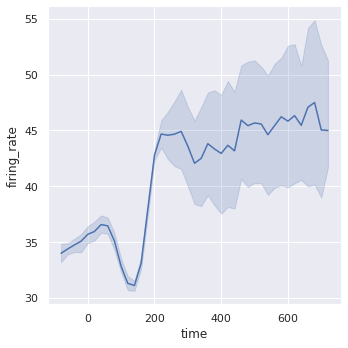

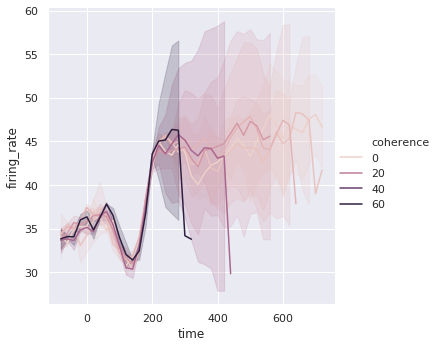

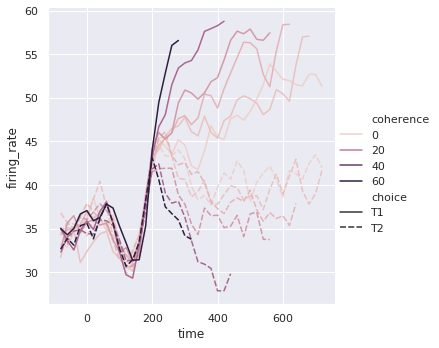

In [14]:
# check the plot pf all dots data
sns.relplot(x='time', y='firing_rate', data=dots, kind='line')
# group by coherence, see whether any pattern changed
sns.relplot(x='time', y='firing_rate', data=dots, kind='line', hue='coherence')
# group by coherence and choice, see whether any pattern changed
sns.relplot(x='time', y='firing_rate', data=dots, kind='line', hue='coherence', style='choice')

<class 'seaborn.palettes._ColorPalette'>


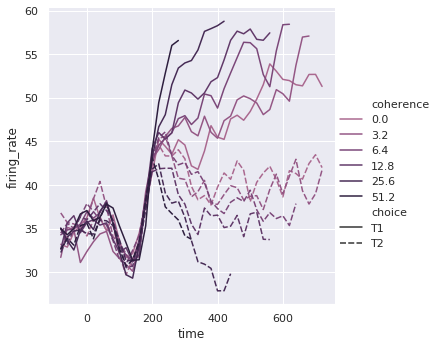

In [15]:
# some color changing tricks
# there are 6 different lines above
# we can define a palette of 6 color
palette = sns.cubehelix_palette(n_colors=6, light=0.5)
print(type(palette))
sns.relplot(x='time', y='firing_rate', data=dots, kind='line', 
            hue='coherence', style='choice', palette=palette)

In [20]:
dateDF = pd.DataFrame({'time': pd.date_range('2019-08-20', periods=500), 
                       'val': np.random.randn(500).cumsum()})
dateDF.head()

,time,val
0,2019-08-20,0.232754
1,2019-08-21,-0.014560
2,2019-08-22,1.314301
3,2019-08-23,0.389918
4,2019-08-24,1.677370


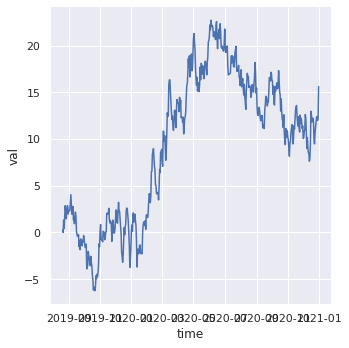

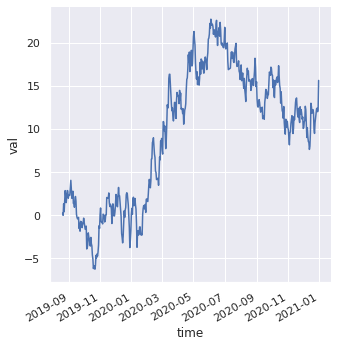

In [28]:
# maive
sns.relplot(x='time', y='val', data=dateDF, kind='line')
# configure the auto formatting the date labels on x-axis
g = sns.relplot(x='time', y='val', data=dateDF, kind='line')
g.fig.autofmt_xdate()
print(g)

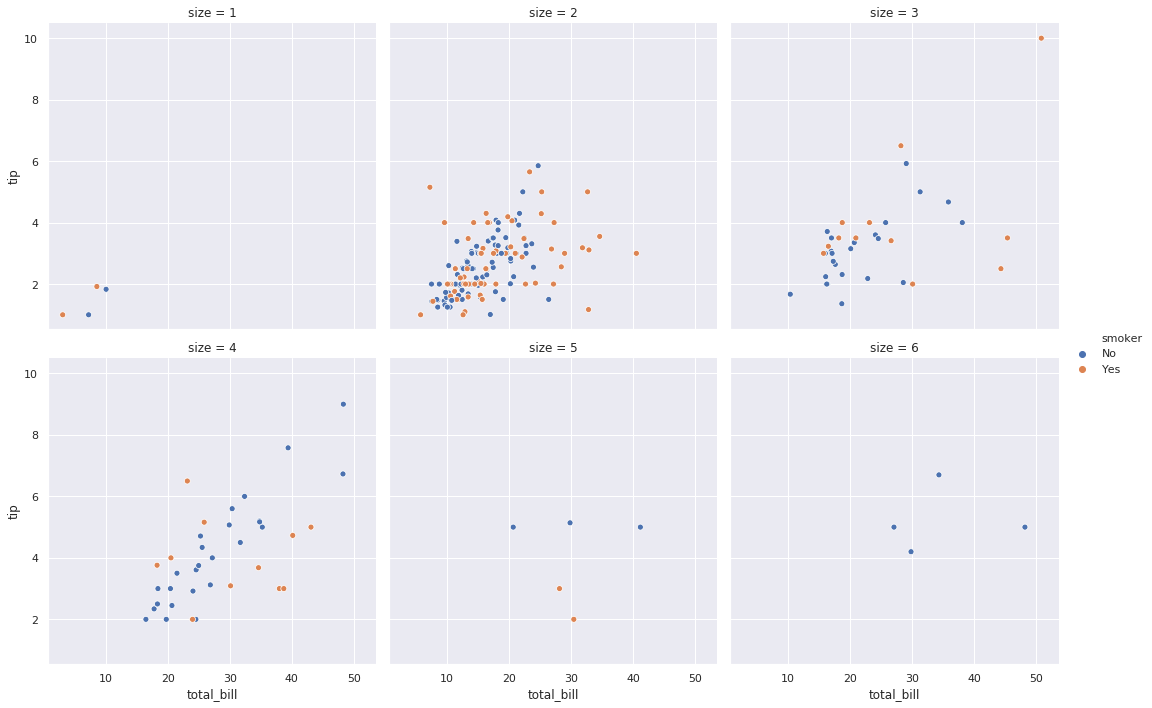

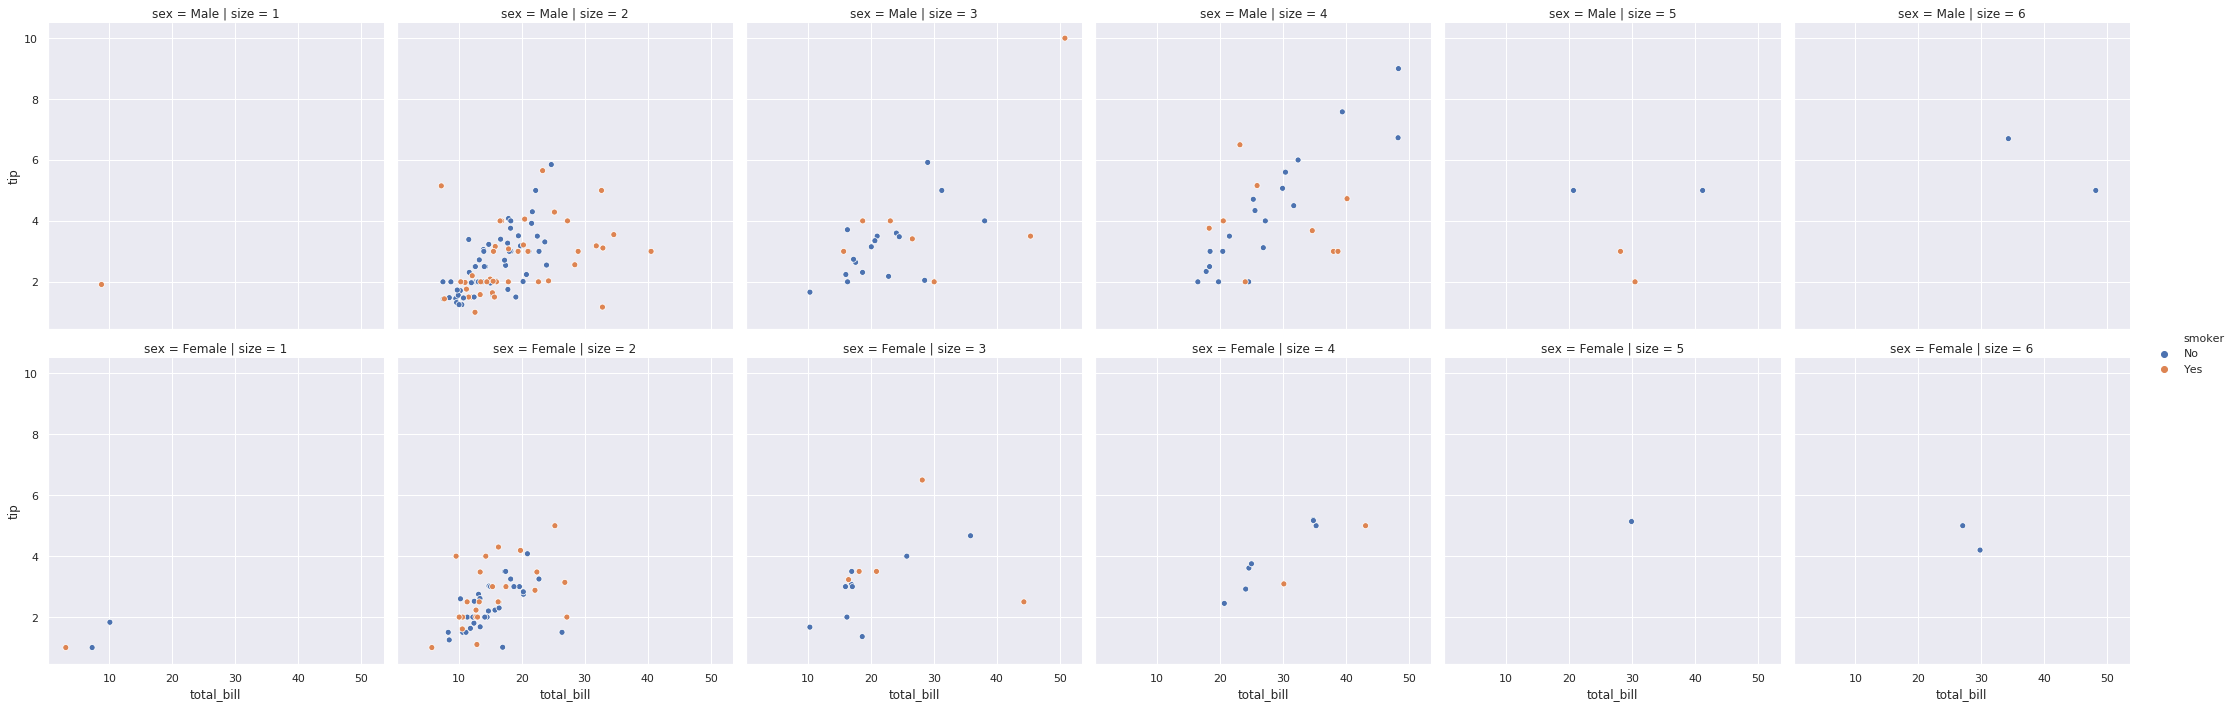

In [40]:
sns.relplot(x='total_bill', y='tip', data=tips, col='size', hue='smoker', col_wrap=3)
sns.relplot(x='total_bill', y='tip', data=tips, col='size', row='sex', hue='smoker')

<a id='sec2'></a>

[back to top](#top2)

In [41]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


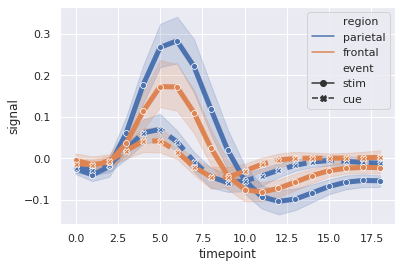

In [52]:
sns.lineplot(x='timepoint', y='signal', data=fmri, hue='region', style='event', markers=True, lw=5)

In [53]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


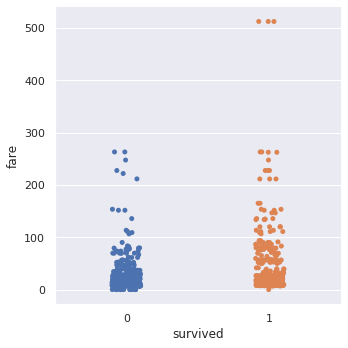

In [60]:
sns.catplot(x='survived', y='fare', data=titanic)

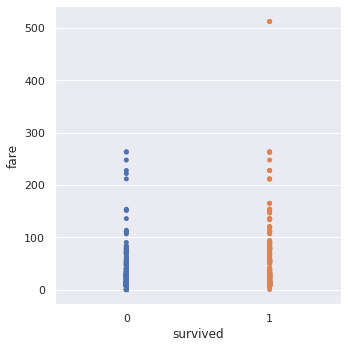

In [61]:
sns.catplot(x='survived', y='fare', data=titanic, jitter=False)

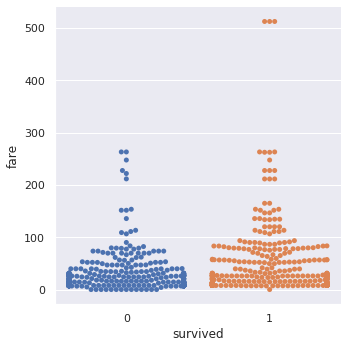

In [64]:
sns.catplot(x='survived', y='fare', data=titanic, kind='swarm')

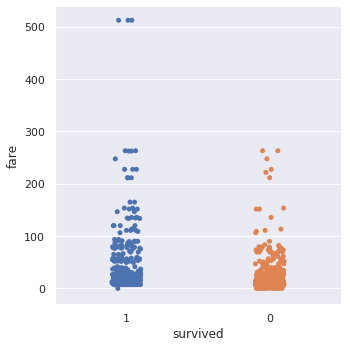

In [68]:
sns.catplot(x='survived', y='fare', data=titanic, order=[1, 0])

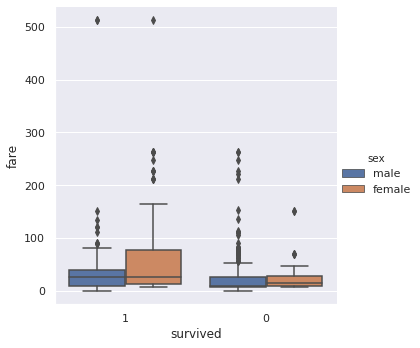

In [71]:
# box plot that include the outliers -> points in black
# maximum and minimum (excluding the outlier) -> the top and low bar
# 75% and 25% quantiles -> the upper and lower boundary of the bin
# median -> the middle line
sns.catplot(x='survived', y='fare', data=titanic, order=[1, 0], kind='box', hue='sex')

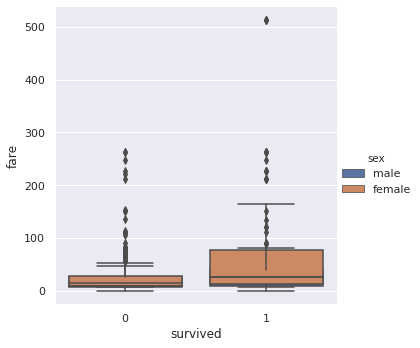

In [73]:
sns.catplot(x='survived', y='fare', data=titanic, order=[0, 1], kind='box', hue='sex', dodge=False)

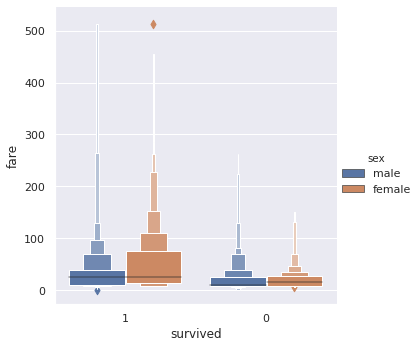

In [87]:
# boxen plot
sns.catplot(x='survived', y='fare', data=titanic, order=[1, 0], kind='boxen', hue='sex')

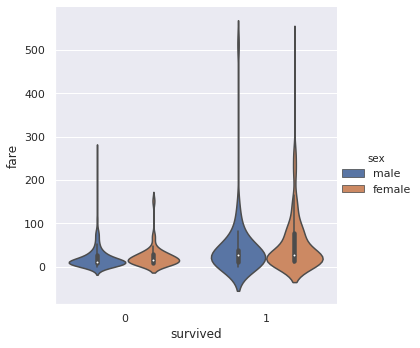

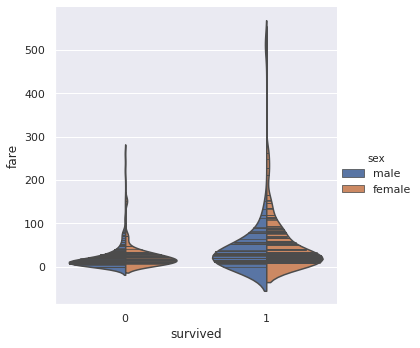

In [89]:
# violin plot - by default there is actually a box plot inside of it
sns.catplot(x='survived', y='fare', data=titanic, kind='violin', hue='sex')
# when ecoding is binary, use splitted violin for the two different classes
sns.catplot(x='survived', y='fare', data=titanic, kind='violin', hue='sex', 
            split=True, inner='stick')

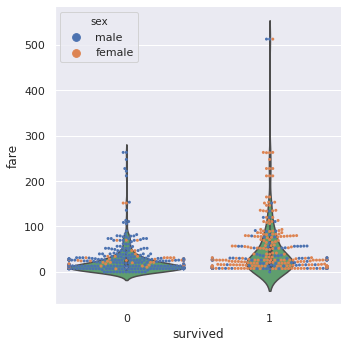

In [97]:
# combine the swam plot with the violin plot
g = sns.catplot(x='survived', y='fare', data=titanic, kind='violin', color='g')
sns.swarmplot(x='survived', y='fare', data=titanic, hue='sex', ax=g.ax, size=3)

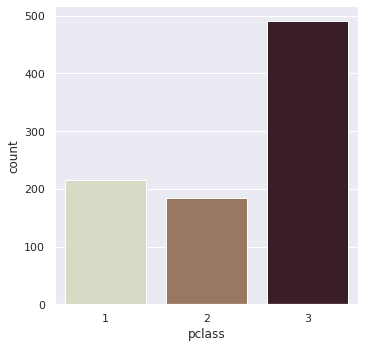

In [115]:
sns.catplot(x='pclass', data=titanic, kind='count', palette='ch:0.55')

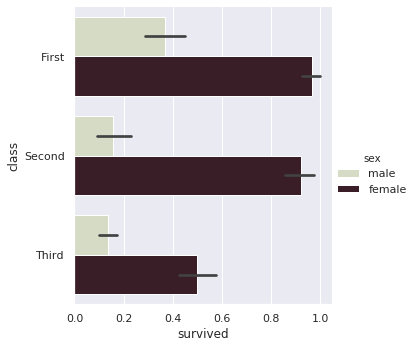

In [119]:
sns.catplot(x='survived', y='class', data=titanic, kind='bar', hue='sex', palette='ch:0.55')

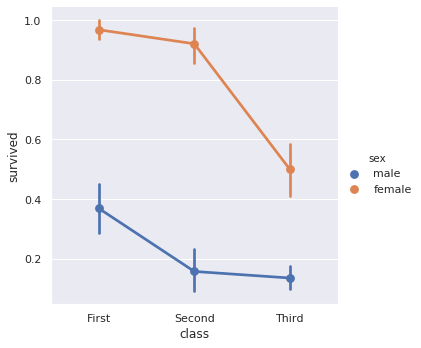

In [123]:
sns.catplot(y='survived', x='class', data=titanic, kind='point', hue='sex')

In [159]:
x = np.random.randn(100)

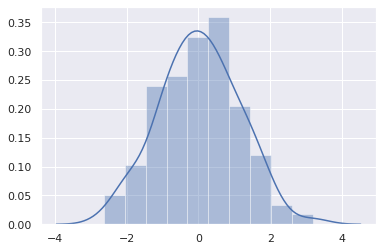

In [160]:
sns.distplot(a=x)

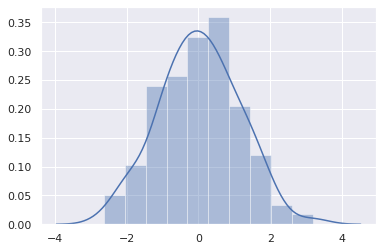

In [161]:
sns.distplot(a=x, rug=False)

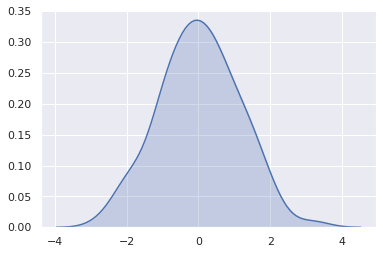

In [167]:
sns.kdeplot(data=x, shade=True)

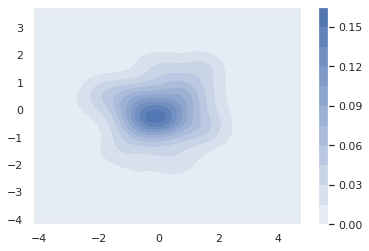

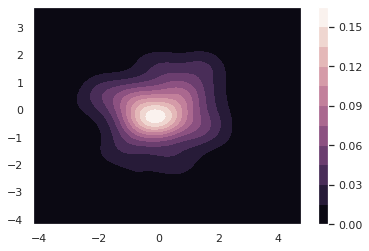

In [189]:
y = np.random.randn(100)
# cbar activate the color bar for bivariate plot
sns.kdeplot(x, y, shade=True, cbar=True)
# the dark theme
f, ax = plt.subplots()
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(x, y, shade=True, cmap=cmap, cbar=True)

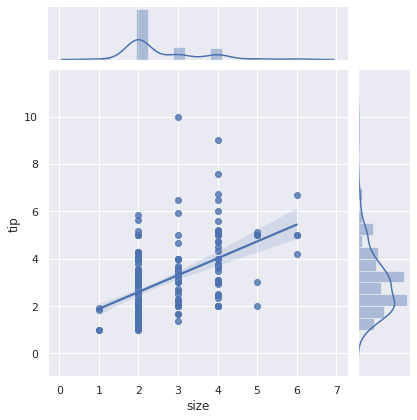

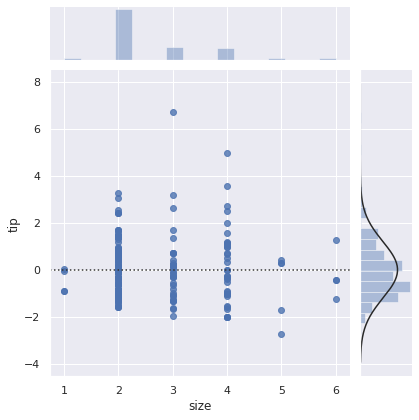

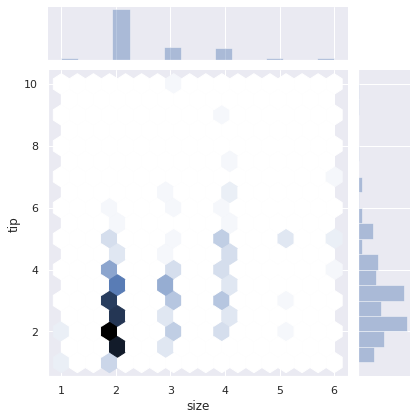

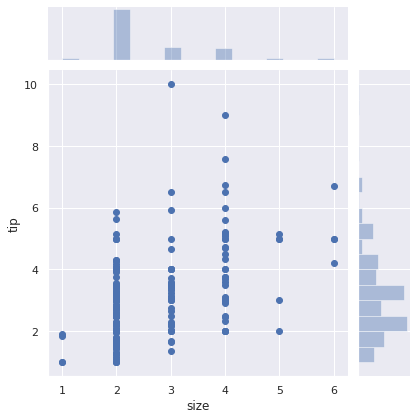

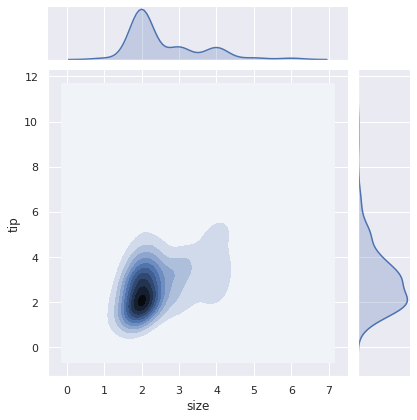

In [179]:
sns.jointplot(x='size', y='tip', data=tips, kind='reg')
sns.jointplot(x='size', y='tip', data=tips, kind='resid')
sns.jointplot(x='size', y='tip', data=tips, kind='hex')
sns.jointplot(x='size', y='tip', data=tips, kind='scatter')
sns.jointplot(x='size', y='tip', data=tips, kind='kde')